In [19]:
# Importing libraries-

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import re
import requests #to extract content from url
import string

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from bs4 import BeautifulSoup as bs #for web scrapping
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [10]:
samsung_reviews = []

In [11]:
for i in range (1,31):
    op=[]
    url ="https://www.amazon.in/product-reviews/B08444S68Q/ref=acr_dp_hist_5?ie=UTF8&filterByStar=five_star&reviewerType=all_reviews"+str(i)
    response = requests.get(url)
    soup = bs(response.content,"html.parser")
    reviews = soup.findAll("span",attrs = {"class","a-size-base review-text review-text-content"})
    for i in range(len(reviews)):
        op.append(reviews[i].text)
    samsung_reviews = samsung_reviews+op

In [12]:
samsung_reviews

["\nS20 Ultra is 6.9 inches of pure smoothness and brilliance. I am coming from One Plus 7pro and was looking to upgrade. 8 Pro sounds like a logical choice, but after having used A70 for sometime, wanted to use the great displays Samsung is famous for.Most people buy phones for various reasons. For me there are following things I look for:1. Display quality2. Ease of use3. Safety and security4. Clean interface with possible customisations5. Of course, the basic ability to make and receive audio/video calls with stability.6. Battery lifeS20 Ultra fulfils most above criterion, except maybe the fingerprint reader. I have used OP 7Pro, Oppo, Realme and Mi. Believe me, fingerprint reader implementation by Samsung is the worst.  It will leave you fuming when you need to unlock phone in a hurry. Face recognition is fast, but with 'mask on' situation, face reader is of no use.That for me is the single bad point for all Samsung phones.Before picking up S20 Ultra, I tried Note 20 Ultra and abso

In [15]:
reviews=  ' '.join(samsung_reviews)

***DATA CLEANING***

In [16]:
reviews = re.sub("[^A-Za-z" "]+"," ",reviews).lower()
reviews = re.sub("[0-9" "]+"," ",reviews).lower()
reviews = re.sub(r'^https?:\/\/.*[\r\n]*', '', reviews).lower()

***TOKENIZE***

In [20]:
reviews_token = word_tokenize(reviews)
reviews_without_sw = [word for word in reviews_token if not word in stopwords.words()]
reviews_without_sw

['ultra',
 'inches',
 'pure',
 'smoothness',
 'brilliance',
 'coming',
 'pro',
 'upgrade',
 'pro',
 'sounds',
 'logical',
 'choice',
 'wanted',
 'great',
 'displays',
 'samsung',
 'famous',
 'buy',
 'phones',
 'reasons',
 'things',
 'display',
 'quality',
 'ease',
 'safety',
 'security',
 'clean',
 'interface',
 'possible',
 'customisations',
 'course',
 'basic',
 'ability',
 'make',
 'receive',
 'audio',
 'video',
 'calls',
 'stability',
 'battery',
 'lifes',
 'ultra',
 'fulfils',
 'criterion',
 'fingerprint',
 'reader',
 'pro',
 'oppo',
 'realme',
 'believe',
 'fingerprint',
 'reader',
 'implementation',
 'samsung',
 'worst',
 'leave',
 'fuming',
 'unlock',
 'phone',
 'hurry',
 'recognition',
 'fast',
 'mask',
 'situation',
 'reader',
 'single',
 'point',
 'samsung',
 'phones',
 'picking',
 'ultra',
 'note',
 'ultra',
 'absolutely',
 'phone',
 'heating',
 'seconds',
 'wise',
 'note',
 'ultra',
 'trumps',
 'ultra',
 'remove',
 'pen',
 'note',
 'ultra',
 'ultra',
 'rectangular',
 'shap

In [21]:
reviews = ' '.join(reviews_without_sw)

***GENERATING WORDCLOUD***

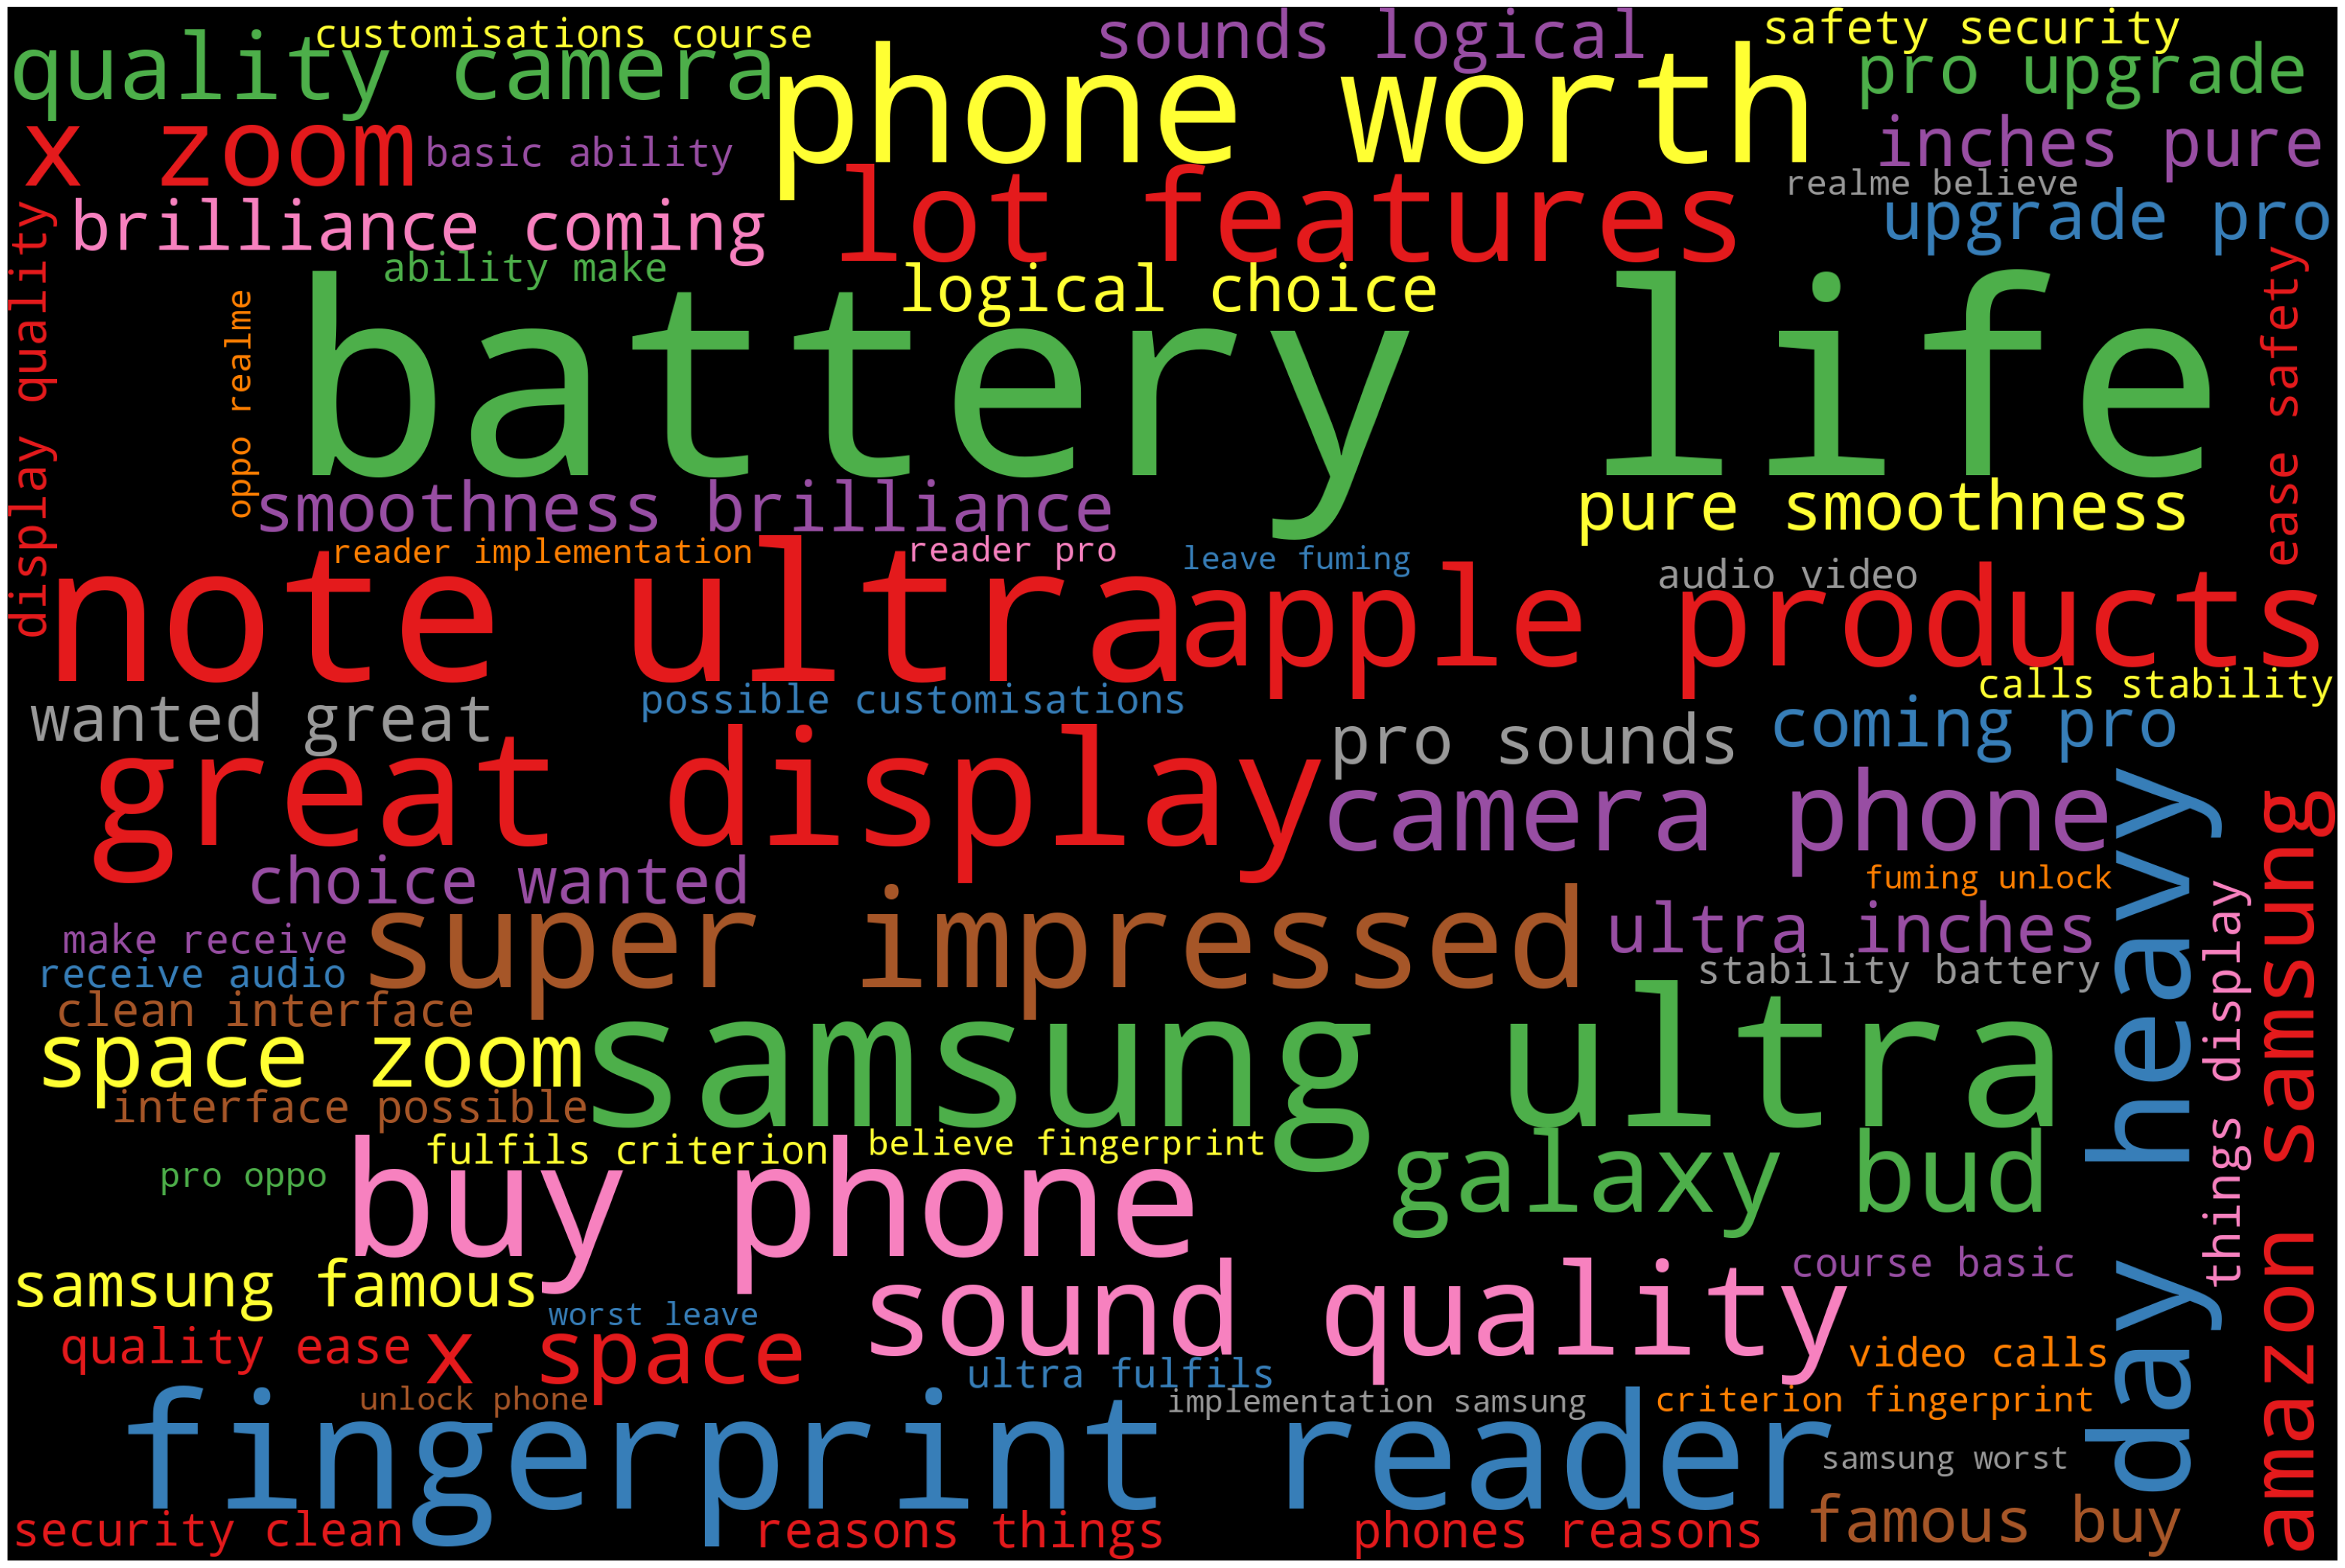

In [23]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')


from wordcloud import WordCloud, STOPWORDS
STOPWORDS.add('refresh')
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=70,
                   colormap='Set1',stopwords=STOPWORDS).generate(reviews)
plot_cloud(wordcloud)

***EMOTION MINING***

In [24]:
with open("positive-words.txt",'r')as f:
  positive=f.read().split("\n")

In [25]:
positive = positive[35:]

In [26]:
positive

['a+',
 'abound',
 'abounds',
 'abundance',
 'abundant',
 'accessable',
 'accessible',
 'acclaim',
 'acclaimed',
 'acclamation',
 'accolade',
 'accolades',
 'accommodative',
 'accomodative',
 'accomplish',
 'accomplished',
 'accomplishment',
 'accomplishments',
 'accurate',
 'accurately',
 'achievable',
 'achievement',
 'achievements',
 'achievible',
 'acumen',
 'adaptable',
 'adaptive',
 'adequate',
 'adjustable',
 'admirable',
 'admirably',
 'admiration',
 'admire',
 'admirer',
 'admiring',
 'admiringly',
 'adorable',
 'adore',
 'adored',
 'adorer',
 'adoring',
 'adoringly',
 'adroit',
 'adroitly',
 'adulate',
 'adulation',
 'adulatory',
 'advanced',
 'advantage',
 'advantageous',
 'advantageously',
 'advantages',
 'adventuresome',
 'adventurous',
 'advocate',
 'advocated',
 'advocates',
 'affability',
 'affable',
 'affably',
 'affectation',
 'affection',
 'affectionate',
 'affinity',
 'affirm',
 'affirmation',
 'affirmative',
 'affluence',
 'affluent',
 'afford',
 'affordable',
 'af

In [27]:
reviews_pos = ' '.join([word for word in reviews_without_sw if word in positive])

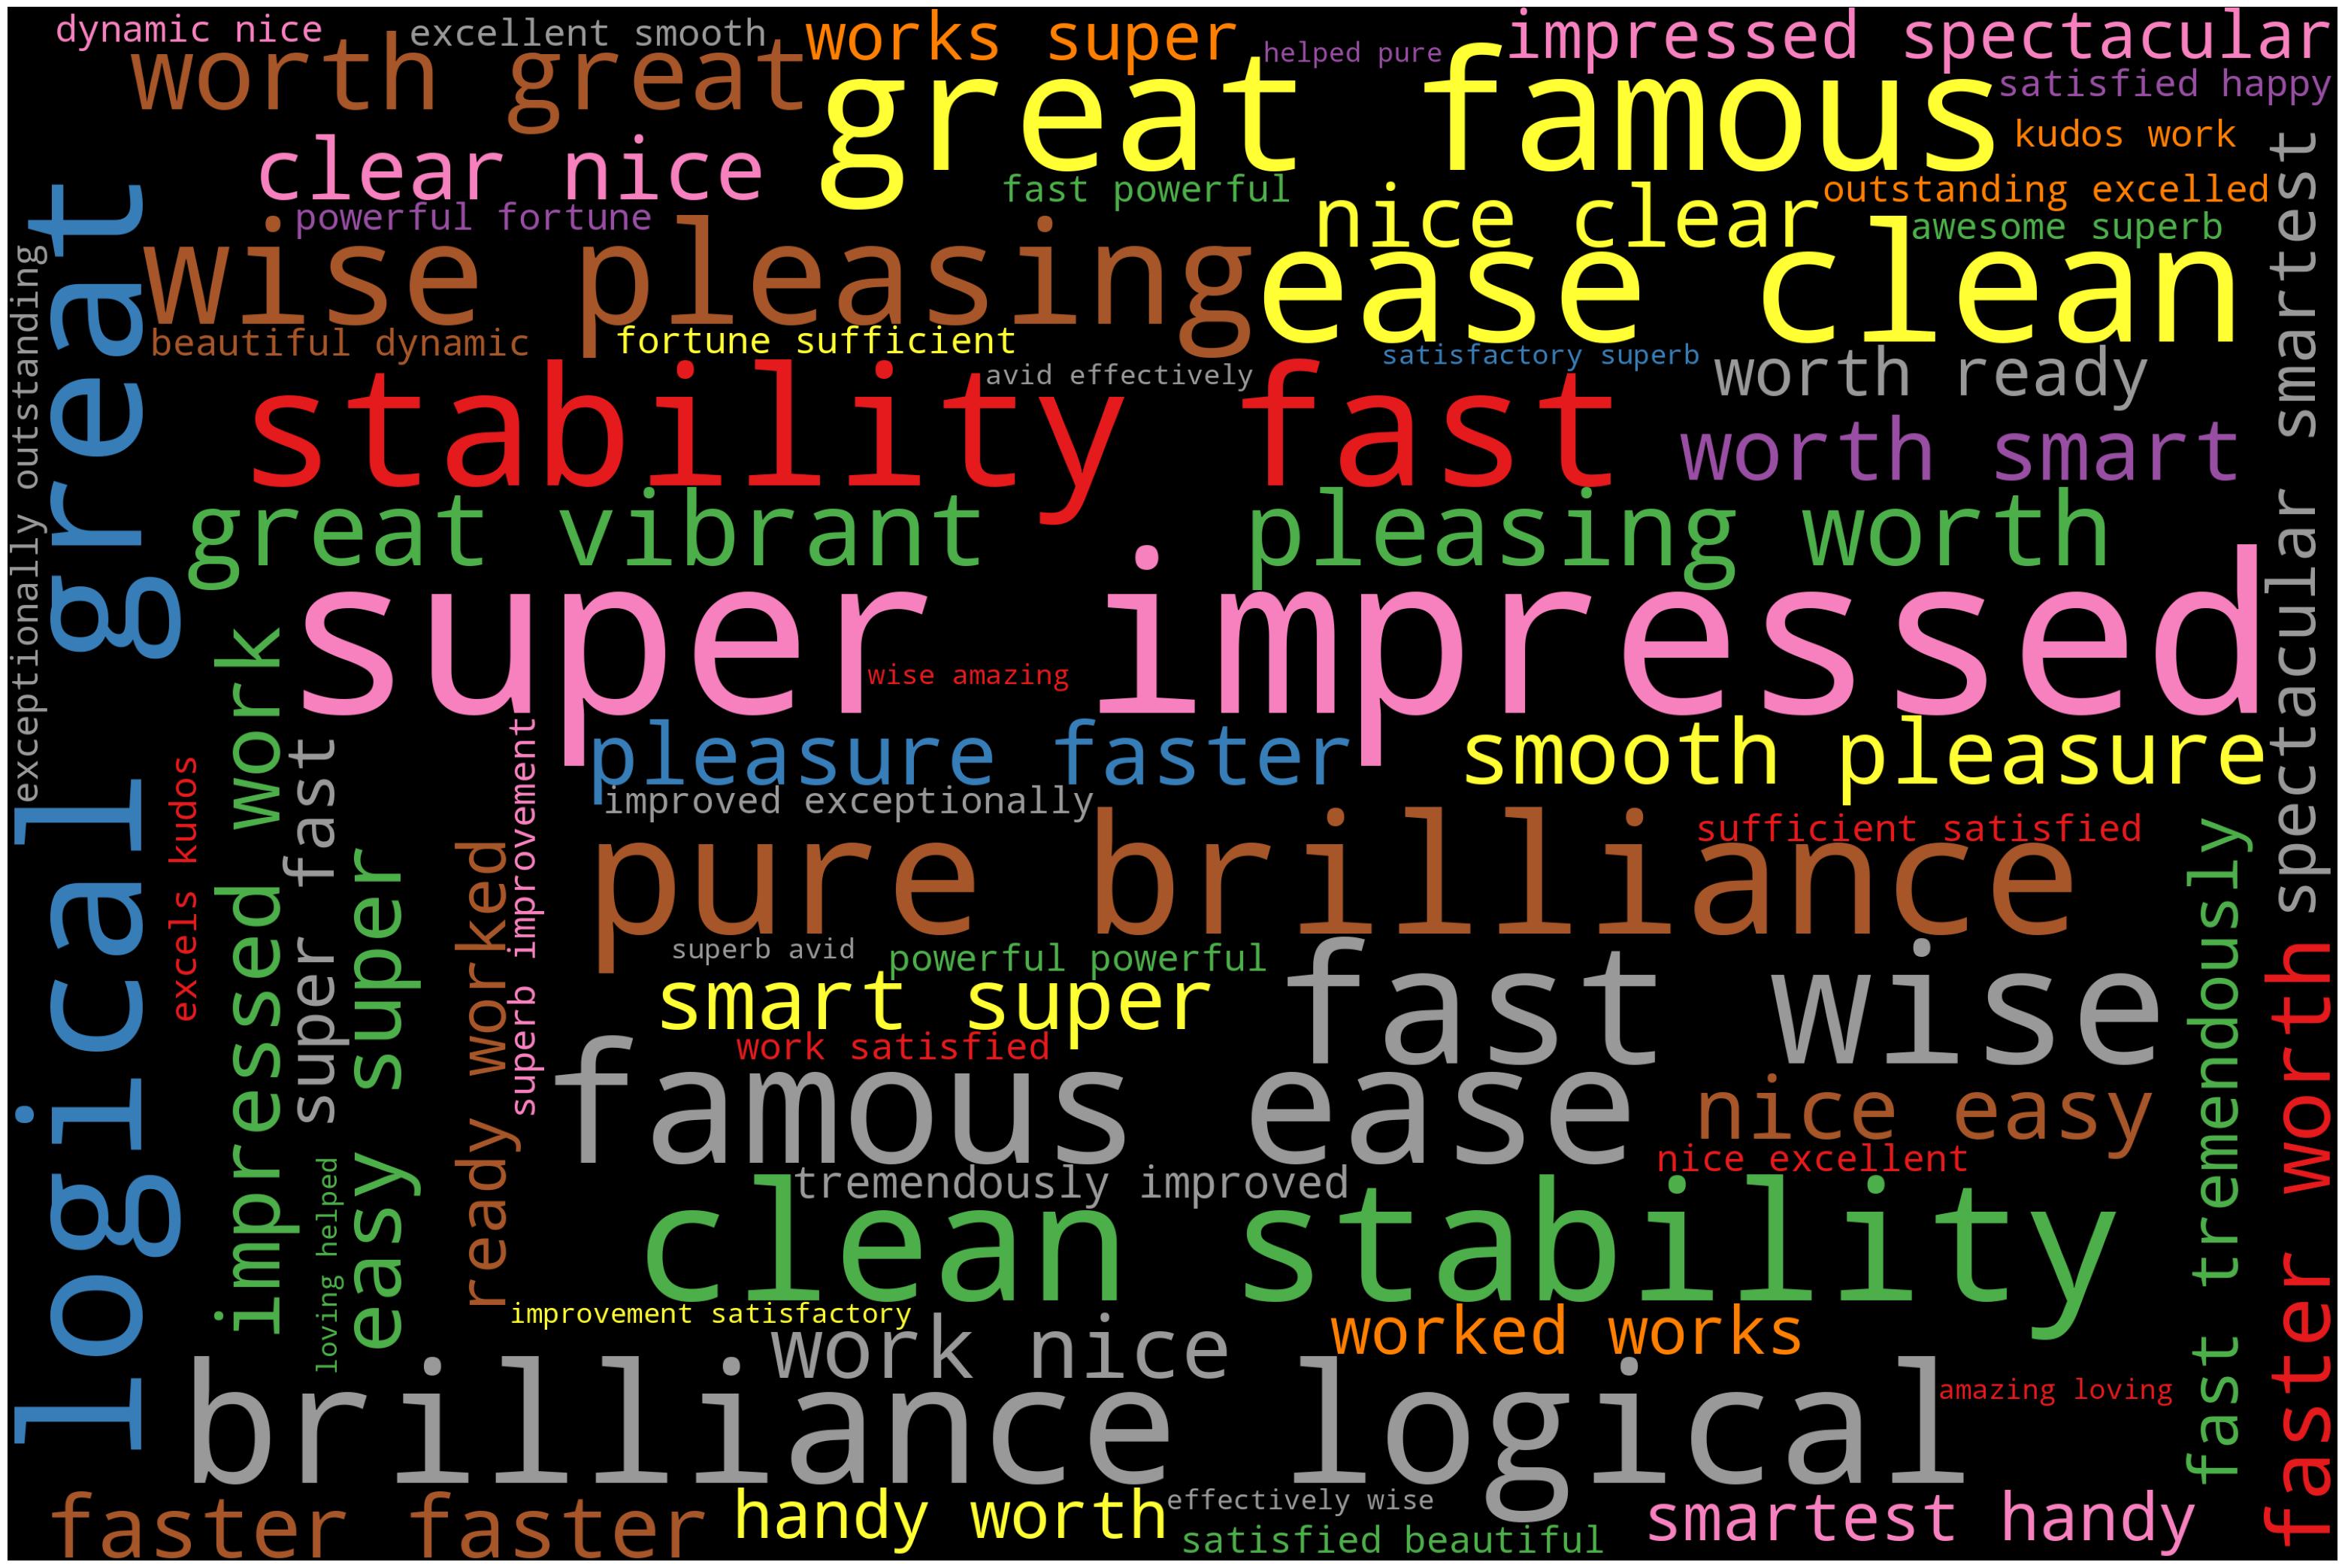

In [28]:
#Generating Wordcloud for positive word
def plot_cloud(wordcloud):
  plt.figure(figsize=(40,30))
  plt.imshow(wordcloud)
  plt.axis('off')

from wordcloud import WordCloud, STOPWORDS
wordcloud=WordCloud(width=3000,height=2000,background_color='black',
                    colormap='Set1',stopwords=STOPWORDS).generate(reviews_pos)

plot_cloud(wordcloud)

In [29]:
with open("negative-words.txt",'r',encoding='latin1') as f:
  negative=f.read().split("\n")

In [30]:
negative=negative[35:]
negative

['2-faced',
 '2-faces',
 'abnormal',
 'abolish',
 'abominable',
 'abominably',
 'abominate',
 'abomination',
 'abort',
 'aborted',
 'aborts',
 'abrade',
 'abrasive',
 'abrupt',
 'abruptly',
 'abscond',
 'absence',
 'absent-minded',
 'absentee',
 'absurd',
 'absurdity',
 'absurdly',
 'absurdness',
 'abuse',
 'abused',
 'abuses',
 'abusive',
 'abysmal',
 'abysmally',
 'abyss',
 'accidental',
 'accost',
 'accursed',
 'accusation',
 'accusations',
 'accuse',
 'accuses',
 'accusing',
 'accusingly',
 'acerbate',
 'acerbic',
 'acerbically',
 'ache',
 'ached',
 'aches',
 'achey',
 'aching',
 'acrid',
 'acridly',
 'acridness',
 'acrimonious',
 'acrimoniously',
 'acrimony',
 'adamant',
 'adamantly',
 'addict',
 'addicted',
 'addicting',
 'addicts',
 'admonish',
 'admonisher',
 'admonishingly',
 'admonishment',
 'admonition',
 'adulterate',
 'adulterated',
 'adulteration',
 'adulterier',
 'adversarial',
 'adversary',
 'adverse',
 'adversity',
 'afflict',
 'affliction',
 'afflictive',
 'affront',


In [31]:
reviews_neg = ' '.join([word for word in reviews_without_sw if word in negative])

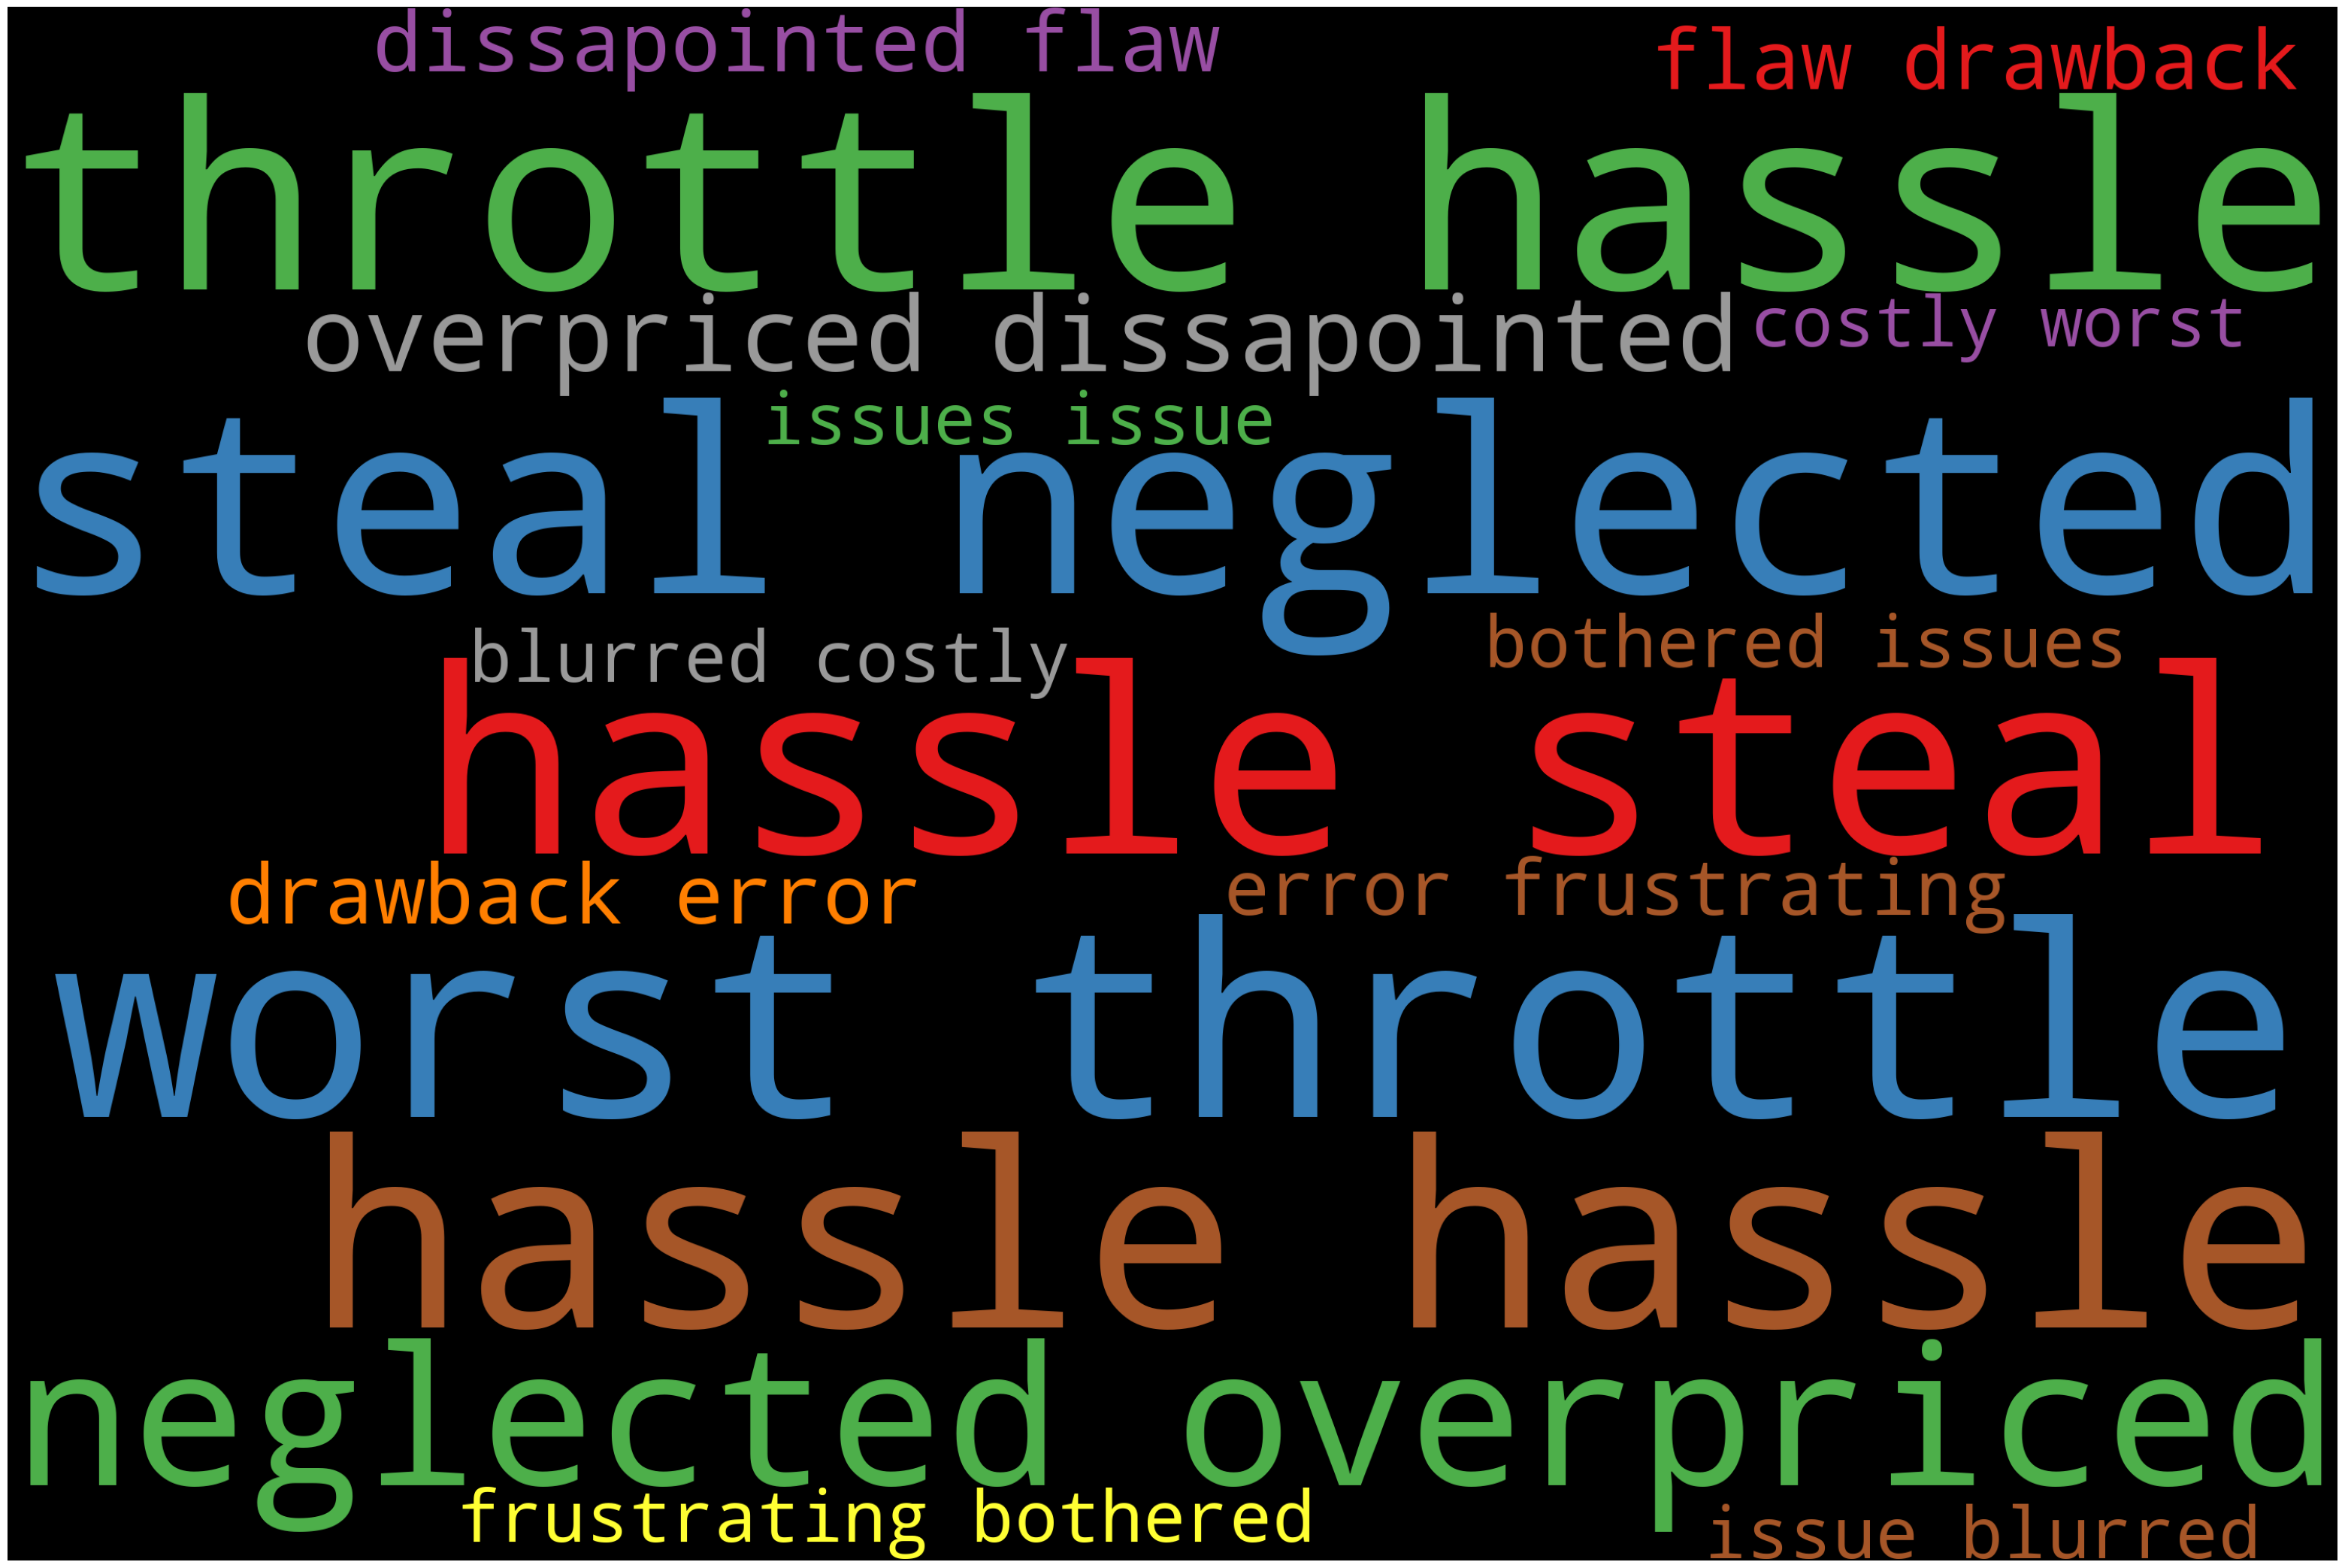

In [33]:
#Generating Worrdcloud for negative words
def plot_cloud(wordcloud):
  plt.figure(figsize=(40,30))
  plt.imshow(wordcloud)
  plt.axis('off')

from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(width=3000,height=2000,background_color='black',
                      colormap='Set1',stopwords=STOPWORDS).generate(reviews_neg)
plot_cloud(wordcloud)